# ML Models

필요한 모듈 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



import warnings
warnings.filterwarnings("ignore")

<br>
<br>

# PyCaret을 활용한 low-code machine learning

<br>
<br>

#### 필수 라이브러리 설치

In [ ]:
!pip install pycaret==2.3.10

     |████████████████████████████████| 125 kB 5.0 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install jinja2==3.1.2

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install xgboost==1.6.0


[여기서 런타임 다시 시작!!]

## 구글 드라이브 접근 권한 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category_encoders

In [ ]:
import os
os.chdir('/content/drive/MyDrive/likelion/credit-now/1_new') # 작업 폴더 있는 곳까지 이동 
os.getcwd()

import credit_data

In [ ]:
#Train set, Test set 분리
train_data, test_data, train_label, test_label = credit_data.load_train_data()
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(18519, 65) (7938, 65) (18519, 1) (7938, 1)


## Pycaret code

In [ ]:
#Pycaret에 필요한 모듈 불러오기
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#train_data 확인
train_data

array([[ 0.14976971, -1.33986217, -1.46041669, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14976971, -0.22402336,  0.05134048, ...,  0.        ,
         0.        ,  0.        ],
       [-1.13455582, -1.33986217, -0.55336239, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.91312038, -0.22402336,  0.23275134, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07166573, -0.22402336, -1.27900583, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.01426821,  2.00765424, -0.4928921 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#test_data 확인
test_data

array([[-0.33738825, -0.22402336, -1.21853554, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25694689, -1.33986217, -0.91618411, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14976971, -0.22402336,  0.59557306, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25694689, -0.22402336, -1.3999464 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42596242, -1.33986217, -0.73477325, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86883329, -1.33986217, -0.9766544 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#현재 폴더 확인
os.getcwd()

'/content/drive/MyDrive/likelion/credit-now/1_new'

In [ ]:
path = '/content/drive/MyDrive/likelion/credit-now/credit_data/'

In [ ]:
#데이터프레임 형태로 불러오기
train_data = pd.read_csv(path + 'train_data.csv')
train_data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_year,credit
0,1,1,0,1,1,247500.0,1,0,2,0,31.178082,4.219178,0,0,1,1,3,0.416667,1
1,2,0,1,1,0,450000.0,0,1,0,0,52.293151,12.147945,0,1,0,4,2,1.833333,2
2,3,1,0,1,0,202500.0,1,0,0,0,41.336986,5.731507,0,1,0,3,2,3.083333,0
3,4,1,1,1,0,157500.0,3,1,0,0,41.197260,5.767123,0,0,0,4,2,2.166667,2
4,5,1,0,1,2,270000.0,0,0,0,0,36.747945,13.687671,0,0,1,6,4,1.500000,1


In [ ]:
train_cat_data = pd.read_csv(path + 'train_cat_data.csv')

In [ ]:
model = setup(data = train_data, 
              target = 'credit',
              train_size = 0.7,
              session_id = 9) 

,Description,Value
0,session_id,9
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(22724, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


# Pycaret 코드 실행

In [ ]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7020,0.4528,0.6865,0.6417,0.2746,0.3374
1,0.6996,0.7056,0.4495,0.6731,0.6391,0.2745,0.3296
2,0.6895,0.7023,0.4228,0.6279,0.6183,0.2362,0.2971
3,0.6882,0.7002,0.4287,0.6575,0.6192,0.2328,0.2939
4,0.6952,0.7088,0.4264,0.6534,0.6217,0.2432,0.3135
5,0.6970,0.6836,0.4434,0.6716,0.6339,0.2606,0.3224
6,0.6994,0.7045,0.4507,0.6818,0.6395,0.2700,0.3278
7,0.7157,0.7040,0.4709,0.7227,0.6588,0.3085,0.3764
8,0.6950,0.7082,0.4413,0.6764,0.6302,0.2514,0.3147


In [ ]:
top_3_models = compare_models(sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7064,0.7427,0.5029,0.6790,0.6723,0.3415,0.3654,2.184
xgboost,Extreme Gradient Boosting,0.6972,0.7015,0.4420,0.6716,0.6326,0.2592,0.3211,8.487
lightgbm,Light Gradient Boosting Machine,0.6951,0.6917,0.4219,0.6754,0.6170,0.2317,0.3141,0.529
ada,Ada Boost Classifier,0.6910,0.6306,0.4066,0.6333,0.6026,0.2045,0.3040,0.692
gbc,Gradient Boosting Classifier,0.6907,0.6548,0.4101,0.6607,0.6056,0.2099,0.3004,7.240
et,Extra Trees Classifier,0.6809,0.7174,0.5086,0.6548,0.6580,0.3143,0.3248,1.977
lda,Linear Discriminant Analysis,0.6423,0.6123,0.3392,0.5354,0.5107,0.0187,0.0640,0.165
ridge,Ridge Classifier,0.6403,0.0000,0.3351,0.5109,0.5033,0.0057,0.0295,0.028
lr,Logistic Regression,0.6400,0.5151,0.3333,0.4096,0.4995,0.0000,0.0000,0.212
nb,Naive Bayes,0.6400,0.5694,0.3333,0.4096,0.4995,0.0000,0.0000,0.040


In [ ]:
predict_model(top_3_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7077,0.7416,0.5089,0.6802,0.674,0.352,0.3755


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.70
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.73
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.70
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.71
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.59
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.66
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.82
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.75


# 모델 블렌딩

In [ ]:
blended = blend_models(estimator_list=top_3_models, fold=10, optimize='Accuracy', method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7071,0.0,0.4520,0.7018,0.6432,0.2801,0.3523
1,0.7008,0.0,0.4454,0.6804,0.6366,0.2687,0.3326
2,0.6989,0.0,0.4271,0.6649,0.6232,0.2474,0.3259
3,0.6933,0.0,0.4324,0.6853,0.6230,0.2382,0.3087
4,0.6983,0.0,0.4308,0.6709,0.6259,0.2499,0.3240
5,0.7014,0.0,0.4468,0.6901,0.6372,0.2672,0.3347
6,0.7044,0.0,0.4471,0.6889,0.6399,0.2734,0.3424
7,0.7164,0.0,0.4634,0.7317,0.6546,0.3023,0.3793
8,0.6975,0.0,0.4364,0.6925,0.6278,0.2482,0.3213


In [ ]:
predict_model(blended) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7009,0,0.4456,0.6883,0.6333,0.2694,0.3412


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_8,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2


In [ ]:
final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
predict_model(final_blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7713,0,0.5656,0.8142,0.7347,0.4627,0.5377


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_8,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2


In [ ]:
train_df = pd.read_csv(path + 'train_data.csv')
holdout_data = train_df.sample(frac=0.10, random_state=0).reset_index(drop=True)

unseen_predictions = predict_model(final_blended, data=holdout_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7667,0,0.5571,0.814,0.7279,0.4466,0.527


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_year,credit,Label
0,17051,1,0,1,1,112500.0,0,1,0,0,29.673973,3.460274,0,0,0,1,3,2.250000,2,2
1,179,0,1,1,0,315000.0,1,0,0,3,46.547945,5.550685,0,0,0,5,2,1.583333,2,2
2,14608,0,1,1,0,270000.0,0,0,0,0,30.816438,6.550685,0,0,0,5,2,4.166667,1,2
3,12723,1,0,1,0,157500.0,2,0,0,0,59.136986,0.000000,0,1,0,0,2,4.416667,2,2
4,14754,0,1,1,1,189000.0,0,1,0,0,36.484932,10.035616,0,0,0,6,3,4.083333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2440,0,0,1,1,292500.0,1,0,2,0,40.506849,8.268493,1,1,0,1,3,1.166667,1,2
2268,12708,1,0,0,0,225000.0,2,1,0,0,61.761644,0.000000,0,0,0,0,2,3.333333,2,2
2269,14382,1,1,1,0,135000.0,2,0,4,0,60.224658,0.000000,0,0,0,0,1,0.833333,2,2
2270,11100,1,0,1,0,90000.0,2,0,2,0,54.882192,0.000000,0,0,0,0,2,3.250000,1,2


# 모델 저장 & 불러오기

In [ ]:
save_model(final_blended, 'final_blended')

In [ ]:
!ls

In [ ]:
import os
from google.colab import files
files.download('final_blended.pkl')

In [ ]:
loaded_model = load_model('final_blended')

In [ ]:
unseen_predictions = predict_model(loaded_model, data=holdout_data)
unseen_predictions

# Logloss 적용 및 predict_proba로 제출하기 위해 metric 추가

In [ ]:
add_metric('logloss', 'LogLoss', log_loss, greater_is_better = False, target = 'pred_proba')

In [ ]:
# svm, ridge는 predict_proba 미지원으로 제외
top_5_models = compare_models(sort = 'logloss',
                              n_select = 3,
                              exclude = ['svm', 'ridge'])

In [ ]:

model_top = top_3_models[0]

plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_3_models[0])

# Accuracy 기반


In [ ]:
blended = blend_models(estimator_list=top_3_models, 
                       fold=10, # default
                       optimize='Accuracy',
                       method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7071,0.0,0.4520,0.7018,0.6432,0.2801,0.3523
1,0.7008,0.0,0.4454,0.6804,0.6366,0.2687,0.3326
2,0.6989,0.0,0.4271,0.6649,0.6232,0.2474,0.3259
3,0.6933,0.0,0.4324,0.6853,0.6230,0.2382,0.3087
4,0.6983,0.0,0.4308,0.6709,0.6259,0.2499,0.3240
5,0.7014,0.0,0.4468,0.6901,0.6372,0.2672,0.3347
6,0.7044,0.0,0.4471,0.6889,0.6399,0.2734,0.3424
7,0.7164,0.0,0.4634,0.7317,0.6546,0.3023,0.3793
8,0.6975,0.0,0.4364,0.6925,0.6278,0.2482,0.3213


In [ ]:
# finalize_model() 
# - fits the model onto the complete dataset including the test/hold-out sample (30% in this case). 
# - The purpose of this function is to train the model on the complete dataset before it is deployed in production.

final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
top_3_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=9, verbose=0,
                        warm_start=False),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_d

In [ ]:
evaluate_model(top_3_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

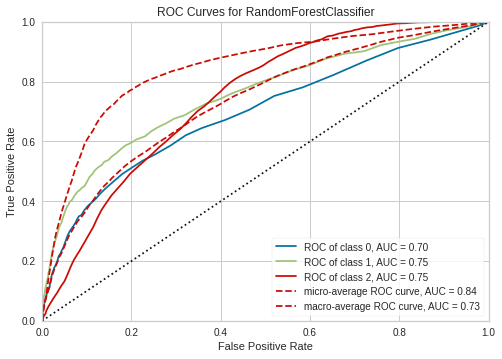

In [ ]:
model_top = top_3_models[0]

plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_3_models[0]) # 미리 제외시켜두었던 test data에 대한 예측 결과값

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7077,0.7416,0.5089,0.6802,0.674,0.352,0.3755


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.70
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.73
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.70
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.71
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.59
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.66
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.82
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.75


In [ ]:
blended = blend_models(estimator_list=top_3_models, 
                       fold=10, # default
                       optimize='Accuracy',
                       method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7071,0.0,0.4520,0.7018,0.6432,0.2801,0.3523
1,0.7008,0.0,0.4454,0.6804,0.6366,0.2687,0.3326
2,0.6989,0.0,0.4271,0.6649,0.6232,0.2474,0.3259
3,0.6933,0.0,0.4324,0.6853,0.6230,0.2382,0.3087
4,0.6983,0.0,0.4308,0.6709,0.6259,0.2499,0.3240
5,0.7014,0.0,0.4468,0.6901,0.6372,0.2672,0.3347
6,0.7044,0.0,0.4471,0.6889,0.6399,0.2734,0.3424
7,0.7164,0.0,0.4634,0.7317,0.6546,0.3023,0.3793
8,0.6975,0.0,0.4364,0.6925,0.6278,0.2482,0.3213


# Logloss 반영

In [ ]:
from pycaret.classification import *
from sklearn.metrics import log_loss

In [ ]:
#logloss 적용 및 predict_proba로 제출하기 위해 metric 추가
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f072a9f8d40>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
#svm, ridge는 predict_proba 미지원으로 제외
best5 = compare_models(fold = 5, sort = 'logloss', n_select = 5, exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
rf,Random Forest Classifier,0.7043,0.7354,0.4973,0.6774,0.6682,0.3318,0.3578,0.7765,2.556
lightgbm,Light Gradient Boosting Machine,0.6943,0.6849,0.4237,0.6773,0.6181,0.2326,0.3110,0.7792,0.758
xgboost,Extreme Gradient Boosting,0.6943,0.6912,0.4405,0.6652,0.6309,0.2557,0.3130,0.7808,9.940
gbc,Gradient Boosting Classifier,0.6912,0.6531,0.4109,0.6568,0.6066,0.2119,0.3025,0.7966,8.542
lda,Linear Discriminant Analysis,0.6419,0.6125,0.3387,0.5274,0.5100,0.0174,0.0594,0.8632,0.204
dummy,Dummy Classifier,0.6400,0.5000,0.3333,0.4096,0.4995,0.0000,0.0000,0.8832,0.050
nb,Naive Bayes,0.6400,0.5688,0.3333,0.4096,0.4995,0.0000,0.0000,0.8836,0.068
lr,Logistic Regression,0.6400,0.5141,0.3333,0.4096,0.4995,0.0000,0.0000,0.9008,1.284
ada,Ada Boost Classifier,0.6910,0.6277,0.4062,0.6299,0.6021,0.2032,0.3045,1.0802,0.828
et,Extra Trees Classifier,0.6780,0.7134,0.5013,0.6507,0.6535,0.3039,0.3152,1.0906,3.006


In [ ]:
blended = blend_models(estimator_list = best5, fold = 5, optimize = 'logloss')
pred_holdout = predict_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.6986,0.7216,0.4274,0.7029,0.6222,0.2423,0.3259,0.7604
1,0.6925,0.7276,0.4154,0.6635,0.6111,0.2206,0.3056,0.7627
2,0.6960,0.7186,0.4224,0.6985,0.6174,0.2309,0.3177,0.7667
3,0.7020,0.7152,0.4267,0.6972,0.6235,0.2461,0.3381,0.7599
4,0.6925,0.7202,0.4151,0.6973,0.6095,0.2146,0.3086,0.7672
Mean,0.6963,0.7206,0.4214,0.6919,0.6167,0.2309,0.3192,0.7634
Std,0.0036,0.0041,0.0053,0.0143,0.0057,0.0121,0.0119,0.0031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.694,0.729,0.4221,0.6817,0.6128,0.2323,0.3215,0.7665


In [ ]:
#lda 와 nb는 losloss가 좋지만 accuracy, auc가 상대적으로 좋지 않아 커스텀모델 생성
custom_model = compare_models(fold = 5, sort = 'logloss', n_select = 6, include=['lightgbm','gbc','rf','ada', 'lda', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
rf,Random Forest Classifier,0.7043,0.7354,0.4973,0.6774,0.6682,0.3318,0.3578,0.7765,2.664
lightgbm,Light Gradient Boosting Machine,0.6943,0.6849,0.4237,0.6773,0.6181,0.2326,0.3110,0.7792,1.866
gbc,Gradient Boosting Classifier,0.6912,0.6531,0.4109,0.6568,0.6066,0.2119,0.3025,0.7966,8.598
lda,Linear Discriminant Analysis,0.6419,0.6125,0.3387,0.5274,0.5100,0.0174,0.0594,0.8632,0.214
nb,Naive Bayes,0.6400,0.5688,0.3333,0.4096,0.4995,0.0000,0.0000,0.8836,0.070
ada,Ada Boost Classifier,0.6910,0.6277,0.4062,0.6299,0.6021,0.2032,0.3045,1.0802,0.826


In [ ]:
blended_custom = blend_models(estimator_list = custom_model, fold = 5, optimize = 'logloss')
pred_holdout_custom = predict_model(blended_custom)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.6936,0.7209,0.4103,0.6845,0.6066,0.2129,0.3136,0.7993
1,0.6913,0.7263,0.4105,0.6656,0.6062,0.2097,0.3036,0.7987
2,0.6944,0.7159,0.4125,0.7071,0.6088,0.2156,0.3158,0.8018
3,0.6970,0.7122,0.4144,0.6918,0.6113,0.2219,0.3255,0.7984
4,0.6885,0.7183,0.4042,0.7378,0.5987,0.1946,0.2962,0.8040
Mean,0.6929,0.7187,0.4104,0.6973,0.6063,0.2110,0.3109,0.8004
Std,0.0029,0.0047,0.0035,0.0242,0.0042,0.0091,0.0101,0.0021


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6888,0.722,0.4095,0.6768,0.6001,0.2073,0.3065,0.8045


# Prediction

In [ ]:
#자동으로 상위 5개 선택한 모델
final_model = finalize_model(blended)

#Accurary, AUC, Logloss 셋다 상위 4개인 모델 
final_model_custom = finalize_model(blended_custom)

In [ ]:
final_model

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

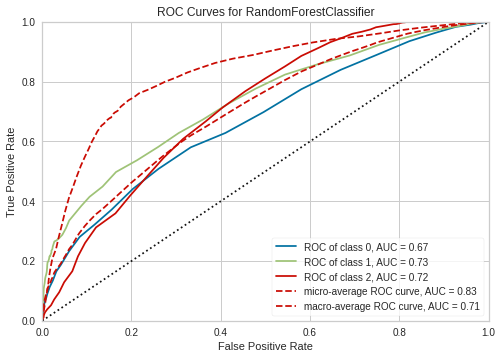

In [ ]:
model_top = top_3_models[0]

plot_model(model_top, plot = 'auc')